In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class opticalSystem:
    def __init__(self, lens1Focal, lens1to2Gap, lens2Focal, lens2to3Gap, lens3Focal):
        #floats, are what they say, in mms
        #below we set up the above as lists
        self.focal = [lens1Focal,lens2Focal,lens3Focal]
        self.delX = [100, lens1to2Gap, lens2to3Gap, 100]
        self.x = [-self.delX[0],0,self.delX[1],self.delX[2]+self.delX[1], self.delX[3]+self.delX[2]+self.delX[1]]
        #then make a list of the Rates of Convergance of our lenses
        self.c = [0,1/self.focal[0],1/self.focal[1],1/self.focal[2]]
    
    def simRay(self,rayC, y1):
        
        y0 = y1 + (rayC*self.delX[0])
        y1 = y1
        y2 = y1 - (rayC + self.c[1]*y1)*(self.delX[1])
        y3 = y2 - (rayC + self.c[1]*y1 + self.c[2]*y2)*self.delX[2]
        y4 = y2 - (rayC + self.c[1]*y1 + self.c[2]*y2 + self.c[3]*y3)*self.delX[3]
        
        y = np.array([y0,y1,y2,y3,y4])
        
        dy0 = (y1-y0)/self.delX[0]
        dy1 = (y2-y1)/self.delX[1]
        dy2 = (y3-y2)/self.delX[2]
        dy3 = (y4-y3)/self.delX[3]
        
        dy = [dy0,dy1,dy2,dy3]
        
        start = 0
        x = np.array(self.x)
        
        return np.array([x,y])

In [3]:
def intersection(x1,y1,x2,y2):
    #this takes the ray data I'm building up and returns any intersections between the two rays.
    #all inputs are lists of points that are connected by lines
    #IT IS ASSUMED ALL INPUT LISTS ARE OF SAME LENGTH, x1 = x2
    
    intersects = []
    #find intersections in the between lens regime
    for i in range(1,len(x1),1):
        denom = y1[i-1]-y1[i]-y2[i-1]+y2[i]
        
        if denom != 0:
            intX = (y1[i-1]-y2[i-1]) * (x1[i]-x1[i-1]) / denom
            intX += x1[i-1]
            intY = y2[i-1] + (intX-x2[i-1]) * (y2[i]-y2[i-1])/(x2[i]-x2[i-1])
            if intX <= x1[i] and intX >= x1[i-1]:
                intersects.append([intX, intY])
                
    
    #find any after lens intersections
    
    
    return np.array(intersects)

In [4]:
def imageRays(distance,yIn,lensRadius,numRays):
    #This function generates a list of indident rays defined by an objects location.
    #all in are floats except numRays, which is an int
    #outputs a numpy array of the rays slopes and x hit on a lens
    rays = []
    
    for i in np.linspace(-lensRadius,lensRadius,num=numRays):
        c = (yIn-i)/distance
        y = i
        rays.append(np.array([c,y]))
    
    
    return np.array(rays)

In [26]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
def plotLenses(x, y, title, xname,yname,line):
    %matplotlib notebook
    plt.figure(figsize=(12, 6), dpi=80)
    #plt.xlim((-1.2,-.2))
    #plt.ylim((25,75))
    plt.scatter(x,y, s=2)
    if line:
        xlin=np.linspace(0,300,1000)
        plt.plot(xlin,xlin)
    plt.ylabel(yname)
    plt.xlabel(xname)
    plt.title(title)
    plt.show()

/tmp/ipykernel_214/267648438.py:23: RuntimeWarning: invalid value encountered in double_scalars
  dy2 = (y3-y2)/self.delX[2]


<IPython.core.display.Javascript object>


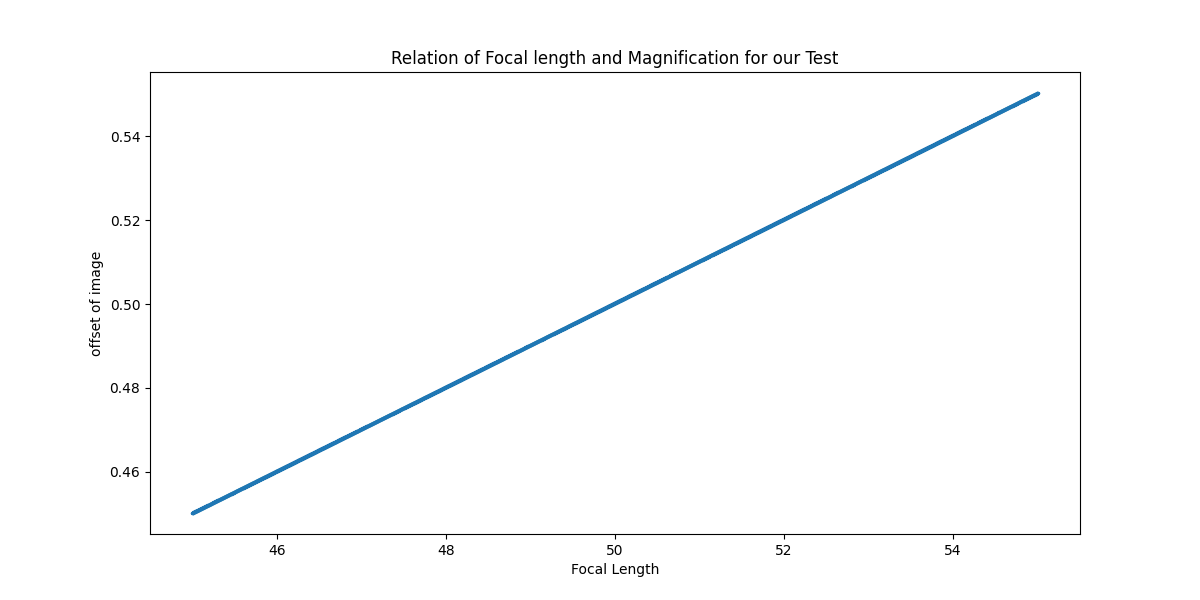

In [27]:
#Now we start exploring some rapid simulating, to see if I can't find a perfect solution. NBD

yHeight = []
rays = imageRays(99999,1000,10,2)

for focal in np.linspace(45,55,5000):
    lens1 =  opticalSystem(focal,9999,99999999,0,99999999)

    x = []
    y = []

    for i in range(0,len(rays[:,0]),1):
        tracedRay = lens1.simRay(rays[i,0],rays[i,1])
        x.append(tracedRay[0])
        y.append(tracedRay[1])

    images = intersection(x[0],y[0],x[1],y[1])
    yHeight.append([focal,images[0,1]])
  

yHeight = np.array(yHeight) 
plotLenses(yHeight[:,0], -1*yHeight[:,1], 'Relation of Focal length and Magnification for our Test', 'Focal Length','offset of image',False)

## End data collection, start analysis

In [ ]:
data = np.load("massLens.npy")
data = np.array(data)
#data in form [saved instance,param]
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2

x=np.linspace(0,300,1000)

plt.figure(figsize=(12, 6), dpi=80)
#plt.ylim((-10,10))
plt.scatter(data[:,7]+data[:,8],data[:,2],s=2)
plt.plot(x,x+45)
plt.ylabel("Filter image X Co-Ordinate")
plt.xlabel("Gaps sum")

In [ ]:
data = np.load("massLens.npy")

print("We started with " + str(len(data)) + " lens designs.")

#cull list for last image is at least 42mm from the last lens, so it'll actually hit the
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2] > data[x,7]+data[x,8]+42]
data = np.array(data)
print("The list is now " + str(len(data)) + " long")
#Remove non-rectilinear
data = [data[x,:] for x in list(range(0, len(data))) if data[x,4] == data[x,5]]
data = np.array(data)
print("The list is now " + str(len(data)) + " long")
#make last image no more than 300mm, arbitrary restriction
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2]<300]
data = np.array(data)
print("The list is now " + str(len(data)) + " long")

x=np.linspace(0,300,1000)

plt.figure(figsize=(12, 6), dpi=80)
#plt.ylim((-10,10))
plt.scatter(data[:,7]+data[:,8],data[:,2],s=2)
plt.plot(x,x)
plt.ylabel("Film image X Co-Ordinate")
plt.xlabel("Gaps sum")

In [ ]:
#this calculates optical center of lenses. Yes, it should have been implemented above
#but it'll be faster to only check 12k lenses

images=[]
for i in list(range(0, len(data))):
    lens = opticalSystem(data[i,4], data[i,7], data[i,5], data[i,8], data[i,6])
    rays = np.array([(1,-2),(-1,2)])
    x = []
    y = []
    for j in [0,1]:
        tracedRay = lens.simRay(rays[j,0],rays[j,1])
        x.append(tracedRay[0])
        y.append(tracedRay[1])
                     
    intersect = intersection(x[0],y[0],x[1],y[1])
    if len(intersect) > 1:
        images.append(intersect[1,:])
    else:
        images.append(np.array([0,0]))
images = np.array(images)
data = np.append(data, images, axis=1)

print(data[0,:])

In [ ]:
x=np.linspace(0,300,1000)

plt.figure(figsize=(12, 6), dpi=80)
#plt.ylim((-10,10))
plt.scatter(data[:,2],data[:,9], s=2)
plt.plot(x,x)
plt.ylabel("Optical Center")
plt.xlabel("Film Image")

In [ ]:
#Cull all center=0 lenses
data = [data[x,:] for x in list(range(0, len(data))) if data[x,9]!=0]
data = np.array(data)
print("The list is now " + str(len(data)) + " long")
#cull lenses with optical center past the lens
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2] > data[x,9]]
data = np.array(data)
print("The list is now " + str(len(data)) + " long")

plt.figure(figsize=(12, 6), dpi=80)
#plt.ylim((-10,10))
plt.scatter(data[:,2],data[:,9], s=2)
plt.plot(x,x)
plt.ylabel("Optical Center")
plt.xlabel("Film Image")

In [ ]:
plt.figure(figsize=(12, 6), dpi=80)
#plt.ylim((-10,10))
plt.scatter(data[:,2],data[:,2] - data[:,9], s=2)
plt.plot(x,x)
plt.ylabel("Focal Distance")
plt.xlabel("Film Image/Lens Length")

In [ ]:
#cull lenses with Focal Distance larger than 65
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2] - data[x,9] < 62.5]
data = np.array(data)
print("The list is now " + str(len(data)) + " long")

plt.figure(figsize=(12, 6), dpi=80)
#plt.ylim((-10,10))
plt.scatter(data[:,2],data[:,2] - data[:,9], s=2)
plt.ylabel("Focal Distance")
plt.xlabel("Film Image/Lens Length")

In [ ]:
#cull lenses with Focal Distance smaller than 20
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2] - data[x,9] > 45]
data = np.array(data)
print("The list is now " + str(len(data)) + " long")
#cull lenses with total length less than 160
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2] < 250]
data = np.array(data)
print("The list is now " + str(len(data)) + " long")

plt.figure(figsize=(12, 6), dpi=80)
#plt.ylim((-10,10))
plt.scatter(data[:,2],data[:,2] - data[:,9], s=8)
plt.ylabel("Focal Distance")
plt.xlabel("Film Image/Lens Length")

In [ ]:
#Finally, we graph our finalists!
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2

for i in np.arange(0,len(data),1):
    #EXAMPLE:intersection of two rays put through an optical system, as well as graphic output of said rays
    lens1Focal = data[i,4]
    lens2Focal = data[i,5]
    lens3Focal = data[i,6]
    gap1 = data[i,7]
    gap2 = data[i,8]
    lens1 = opticalSystem(lens1Focal, gap1, lens2Focal, gap2, lens3Focal)
    rays = imageRays(9999,1000,10,25)

    x = []
    y = []

    for i in range(0,len(rays[:,0]),1):
        tracedRay = lens1.simRay(rays[i,0],rays[i,1])
        x.append(tracedRay[0])
        y.append(tracedRay[1])

    plt.figure(figsize=(12, 6), dpi=80)
    plt.ylim((-10, 10))
    for i in range(0,len(rays[:,0]),1):
        plt.plot(x[i],y[i],'b',linewidth=0.5)


    plt.axvline(x = 0, color = 'k', label = 'axvline - full height')
    plt.axvline(x = gap1, color = 'k', label = 'axvline - full height')
    plt.axvline(x = gap2+gap1, color = 'k', label = 'axvline - full height')


    images = intersection(x[0],y[0],x[9],y[9])
    plt.plot(images[:,0],images[:,1],'k*')

In [ ]:
win = data[9,:]
print(win)

In [ ]:
focal1 = win[4]
focal2 = win[5]
focal3 = win[6]
Gap1s = np.linspace(40,60,100)
Gap2s = np.linspace(60,80,100)
fit = 0
tested = 0
print(Gap1s)
data = []
for gap1 in Gap1s:
    for gap2 in Gap2s:
        lens1 = opticalSystem(focal1, gap1, focal2, gap2, focal3)
        rays = imageRays(9999,1,10,25)
        x = []
        y = []

        for i in range(0,len(rays[:,0]),1):
            tracedRay = lens1.simRay(rays[i,0],rays[i,1])
            x.append(tracedRay[0])
            y.append(tracedRay[1])

        images = intersection(x[0],y[0],x[24],y[24])

        #save settup data if we get any images at all
        inner = []
        outer = []
        for image in images:
            if image[0]<(gap1+gap2) and image[0] > gap1:
                inner = image
            elif image[0] > (gap1+gap2):
                outer = image

        if inner != [] and outer != []:
            data.append([inner[0], inner[1], outer[0],outer[1], focal1, focal2, focal3, gap1, gap2])

            fit += 1
        tested += 1

print("I tested " + str(tested) + " lens setups and found " + str(fit) + " that satisfied image location requirments.")
data = np.array(data)


In [ ]:
#find optical center
images = []
for i in list(range(0, len(data))):
    lens = opticalSystem(data[i,4], data[i,7], data[i,5], data[i,8], data[i,6])
    rays = np.array([(1,-2),(-1,2)])
    x = []
    y = []
    for j in [0,1]:
        tracedRay = lens.simRay(rays[j,0],rays[j,1])
        x.append(tracedRay[0])
        y.append(tracedRay[1])
                     
    intersect = intersection(x[0],y[0],x[1],y[1])
    if len(intersect) > 1:
        images.append(intersect[1,:])
    else:
        images.append(np.array([0,0]))
images = np.array(images)
data = np.append(data, images, axis=1)

In [ ]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2
%matplotlib notebook

plt.figure(figsize=(12, 6), dpi=80)
#plt.xlim((-1.2,-.2))
#plt.ylim((25,75))
plt.scatter(data[:,3]/data[:,1],data[:,7], s=2)
plt.plot(x,x)
plt.ylabel("Gap 1")
plt.xlabel("Film over Filter Scale")
plt.show()

In [ ]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2
%matplotlib notebook

plt.figure(figsize=(12, 6), dpi=80)
#plt.xlim((-1.2,-.2))
#plt.ylim((25,75))
plt.scatter(data[:,3]/data[:,1],data[:,2] - data[:,9], s=2)
plt.plot(x,x)
plt.ylabel("Focal Distance")
plt.xlabel("Film over Filter Scale")
plt.show()